# Problema Fuzzy: Precificação do jogo Rua do Crime VI

A Pedra Estelar Jogos está decidindo qual será o preço de lançamento do aguardado jogo Rua do Crime VI, a ser lançado em 26/05/2026. A decisão será baseada em dois fatores avaliados.

## Variáveis de entrada:

* Expectativa do público: varia de 0 a 10, com termos linguísticos baixa, média e alta.
* Situação econômica no lançamento: também de 0 a 10, onde 0 representa crise e 10 uma economia muito favorável. Os termos linguísticos são desfavorável, estável e favorável.

## Variável de saída:

* Preço do jogo (USD): de 70 a 110 dólares, com categorias linguísticas normal, alto e altíssimo.

## Regras fuzzy:

| Expectativa do público | Situação econômica | Preço do jogo |
|------------------------|--------------------|---------------|
| Baixa                  | Desfavorável       | Normal        |
| Baixa                  | Estável            | Normal        |
| Baixa                  | Favorável          | Alto          |
| Média                  | Desfavorável       | Normal        |
| Média                  | Estável            | Alto          |
| Média                  | Favorável          | Altíssimo     |
| Alta                   | Desfavorável       | Alto          |
| Alta                   | Estável            | Altíssimo     |
| Alta                   | Favorável          | Altíssimo     |

## Tarefa:

1. Crie um sistema Fuzzy que modele esse cenário e compute um preço a partir das variáveis de entrada.
2. Mostre os gráficos de entrada e saída.
3. Compute o exemplo expectativa = 10 e situação econômica = 5.

In [1]:
!pip install --user scikit-fuzzy

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

Preço sugerido: $90.00


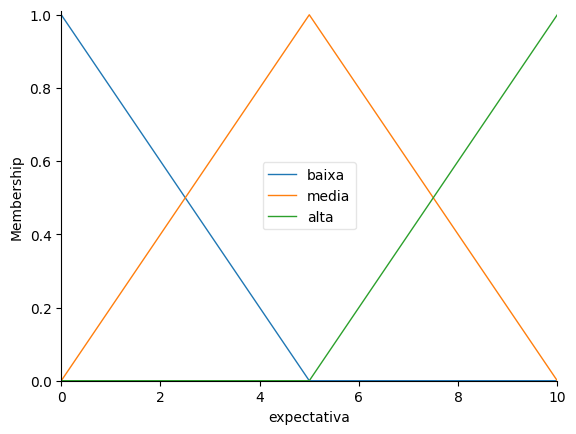

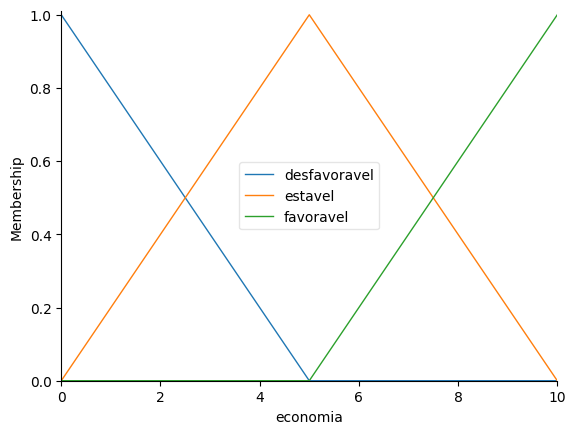

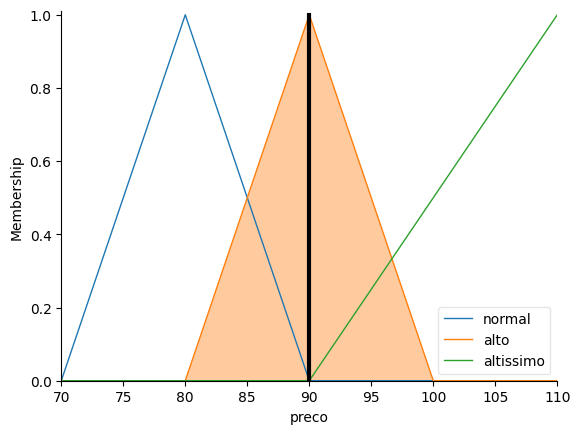

In [6]:
expectativa = ctrl.Antecedent(np.arange(0, 11, 1), 'expectativa')
economia = ctrl.Antecedent(np.arange(0, 11, 1), 'economia')

preco = ctrl.Consequent(np.arange(70, 111, 1), 'preco')

expectativa['baixa'] = fuzz.trimf(expectativa.universe, [0, 0, 5])
expectativa['media'] = fuzz.trimf(expectativa.universe, [0, 5, 10])
expectativa['alta'] = fuzz.trimf(expectativa.universe, [5, 10, 10])

economia['desfavoravel'] = fuzz.trimf(economia.universe, [0, 0, 5])
economia['estavel'] = fuzz.trimf(economia.universe, [0, 5, 10])
economia['favoravel'] = fuzz.trimf(economia.universe, [5, 10, 10])

preco['normal'] = fuzz.trimf(preco.universe, [70, 80, 90])
preco['alto'] = fuzz.trimf(preco.universe, [80, 90, 100])
preco['altissimo'] = fuzz.trimf(preco.universe, [90, 110, 110])

# Regras fuzzy da tabela
regra1 = ctrl.Rule(expectativa['baixa'] & economia['desfavoravel'], preco['normal'])
regra2 = ctrl.Rule(expectativa['baixa'] & economia['estavel'], preco['normal'])
regra3 = ctrl.Rule(expectativa['baixa'] & economia['favoravel'], preco['alto'])
regra4 = ctrl.Rule(expectativa['media'] & economia['desfavoravel'], preco['normal'])
regra5 = ctrl.Rule(expectativa['media'] & economia['estavel'], preco['alto'])
regra6 = ctrl.Rule(expectativa['media'] & economia['favoravel'], preco['altissimo'])
regra7 = ctrl.Rule(expectativa['alta'] & economia['desfavoravel'], preco['alto'])
regra8 = ctrl.Rule(expectativa['alta'] & economia['estavel'], preco['alto'])
regra9 = ctrl.Rule(expectativa['alta'] & economia['favoravel'], preco['altissimo'])

preco_ctrl = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9])
preco_simulador = ctrl.ControlSystemSimulation(preco_ctrl)

preco_simulador.input['expectativa'] = 10
preco_simulador.input['economia'] = 5
preco_simulador.compute()

print(f"Preço sugerido: ${preco_simulador.output['preco']:.2f}")

expectativa.view()
economia.view()
preco.view(sim=preco_simulador)
